In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor, 
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

In [2]:
train = pd.read_csv(r'C:/Users/liqian/Desktop/机器学习课程设计/Titanic/train.csv')
test = pd.read_csv(r'C:/Users/liqian/Desktop/机器学习课程设计/Titanic/test.csv')

In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train['Survived'].value_counts()#存活人数

0    549
1    342
Name: Survived, dtype: int64

<Figure size 432x288 with 0 Axes>

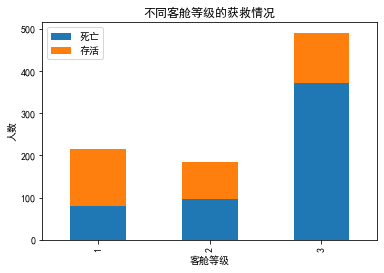

In [6]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()
df=pd.DataFrame({'死亡':Survived_0,'存活':Survived_1})
df.plot(kind='bar', stacked=True)
plt.title("不同客舱等级的获救情况")
plt.xlabel("客舱等级") 
plt.ylabel("人数") 
plt.show()

<Figure size 432x288 with 0 Axes>

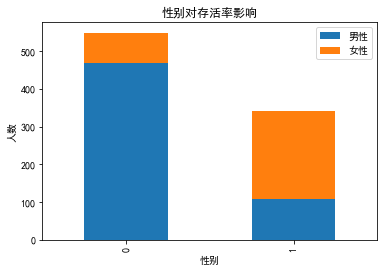

In [7]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

Survived_m = train.Survived[train.Sex == 'male'].value_counts()
Survived_f = train.Survived[train.Sex == 'female'].value_counts()
df=pd.DataFrame({'男性':Survived_m, '女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title("性别对存活率影响")
plt.xlabel("性别") 
plt.ylabel("人数")
plt.show()

<Figure size 432x288 with 0 Axes>

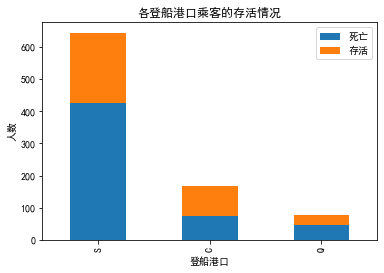

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

Survived_0 = train.Embarked[train.Survived == 0].value_counts()
Survived_1 = train.Embarked[train.Survived == 1].value_counts()
df=pd.DataFrame({'死亡':Survived_0,'存活':Survived_1})
df.plot(kind='bar', stacked=True)
plt.title("各登船港口乘客的存活情况")
plt.xlabel("登船港口") 
plt.ylabel("人数") 

plt.show()

Text(11.555555555555557, 0.5, '密度')

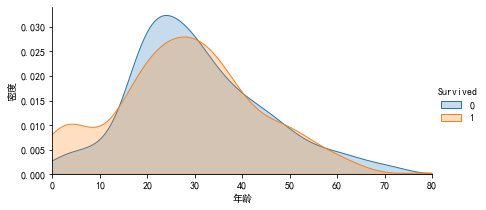

In [9]:
facet = sns.FacetGrid(train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('年龄') 
plt.ylabel('密度') 

Text(11.555555555555557, 0.5, '密度')

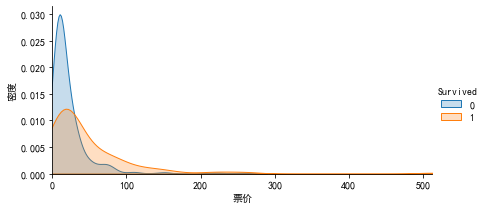

In [10]:
facet_2 = sns.FacetGrid(train, hue="Survived",aspect=2)
facet_2.map(sns.kdeplot,'Fare',shade= True)
facet_2.set(xlim=(0, train['Fare'].max()))
facet_2.add_legend()
plt.xlabel('票价') 
plt.ylabel('密度') 

Text(0.5, 1.0, '父母/孩子')

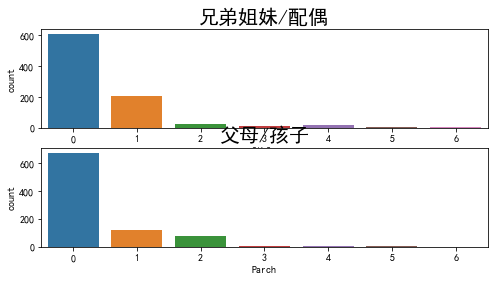

In [11]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(211)
sns.countplot(train.SibSp)
ax1.set_title('兄弟姐妹/配偶', size=20)
ax2 = fig.add_subplot(212, sharex=ax1)
sns.countplot(train.Parch)
ax2.set_title('父母/孩子', size=20)

Text(0.5, 1.0, '家庭人数下的生存率')

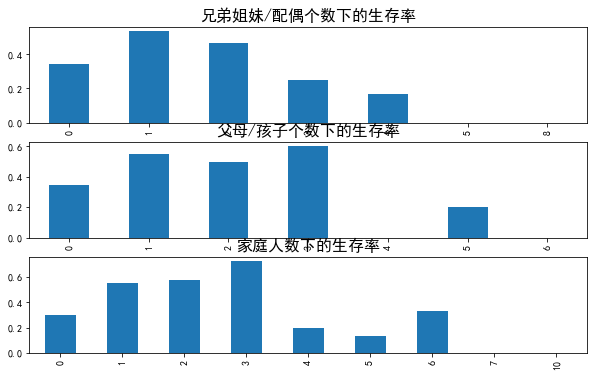

In [12]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311)
train.groupby('SibSp')['Survived'].mean().plot(kind='bar', ax=ax1)
ax1.set_title('兄弟姐妹/配偶个数下的生存率', size=16)
ax1.set_xlabel('')

ax2 = fig.add_subplot(312)
train.groupby('Parch')['Survived'].mean().plot(kind='bar', ax=ax2)
ax2.set_title('父母/孩子个数下的生存率', size=16)
ax2.set_xlabel('')

ax3 = fig.add_subplot(313)
train.groupby(train.SibSp+train.Parch)['Survived'].mean().plot(kind='bar', ax=ax3)
ax3.set_title('家庭人数下的生存率', size=16)

In [13]:
#数据处理
#trian集中有Age，Embarked，Cabin存在缺失
#test集中有Age，Fare，Cabin存在缺失
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

train, rfr = set_missing_ages(train)#train集缺失的Age填充

In [14]:
train.Embarked.fillna('S',inplace=True)#train集缺失的Embarked填充

In [15]:
#test集缺失的Age填充
tmp_df = test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[test.Age.isnull()].values
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
test.loc[ (test.Age.isnull()), 'Age' ] = predictedAges

In [16]:
#trian,test集缺失的Cabin填充
train['Cabin'] = train['Cabin'].isnull().apply(lambda x: 'Null' if x is True else 'Not Null')
test['Cabin'] = test['Cabin'].isnull().apply(lambda x: 'Null' if x is True else 'Not Null')

In [17]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Null,S


In [18]:
#根据该乘客登船点，性别及舱室等级，取同类型均值
test.loc[test.Fare.isnull(),'Fare'] = \
test[(test.Pclass==3)&(test.Embarked=='S')&(test.Sex=='male')].dropna().Fare.mean()

In [19]:
#收敛Fare及Age
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
#Fare
fare_scale_param = scaler.fit(train['Fare'].values.reshape(-1, 1))
train.Fare = fare_scale_param.transform(train['Fare'].values.reshape(-1, 1))
test.Fare = fare_scale_param.transform(test['Fare'].values.reshape(-1, 1))
#Age
age_scale_param = scaler.fit(train['Age'].values.reshape(-1, 1))
train.Age = age_scale_param.transform(train['Age'].values.reshape(-1, 1))
test.Age = age_scale_param.transform(test['Age'].values.reshape(-1, 1))

In [20]:
train_x = pd.concat([train[['SibSp','Parch','Fare']], pd.get_dummies(train[['Pclass','Sex','Cabin','Embarked','Age']])],axis=1)
train_y = train.Survived
test_x = pd.concat([test[['SibSp','Parch','Fare']], pd.get_dummies(test[['Pclass', 'Sex','Cabin','Embarked', 'Age']])],axis=1)

In [21]:
base_line_model = LogisticRegression()
param = {'penalty':['l1','l2'], 
        'C':[0.1, 0.5, 1.0,5.0]}
grd = GridSearchCV(estimator=base_line_model, param_grid=param, cv=5, n_jobs=3)
grd.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': [0.1, 0.5, 1.0, 5.0], 'penalty': ['l1', 'l2']})

In [22]:
gender_submission = pd.DataFrame({'PassengerId':test.iloc[:,0],'Survived':grd.predict(test_x)})
gender_submission.to_csv('C:/Users/liqian/Desktop/gender_submission.csv', index=None)